

# Team A, 5th Sem, A Division, SOCSE
# Topic ID :- 5DMACP16

Project Title :- Predicting response times of the Paris Fire Brigade vehicles

Team Members:

Roll_no  USN             NAME

16       01FE17BCS016    Aishwarya M              
18       01FE17BCS020    Akash Bilgi        
19       01FE17BCS244    Yashas J            
22       01FE17BCS022    Akhila G




# Data Exploration 


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%pylab inline

x_train = pd.read_csv('x_train.csv')
x_test = pd.read_csv('x_test.csv')
x_train_a = pd.read_csv('x_train_a.csv')
x_test_a = pd.read_csv('x_test_a.csv')
y_train=pd.read_csv('y_train.csv')

Populating the interactive namespace from numpy and matplotlib


In [2]:
x_train.head().transpose()

,0,1,2,3,4
emergency_vehicle_selection,5105452,4720915,5365374,4741586,5381209
intervention,13264186,12663715,13675521,12695745,13698743
alert_reason_category,3,3,3,3,3
alert_reason,2162,2124,2163,2162,2162
intervention_on_public_roads,0,0,0,0,0
floor,0,1,2,0,3
location_of_the_event,148,136,139,136,104
longitude_intervention,2.2848,2.24746,2.25833,2.39383,2.45861
latitude_intervention,48.8797,48.8182,48.8368,48.7765,48.8758
emergency_vehicle,4511,4327,4509,5731,5623


Columns present in x_train and there data types

In [3]:
x_train.dtypes

emergency_vehicle_selection                          int64
intervention                                         int64
alert_reason_category                                int64
alert_reason                                         int64
intervention_on_public_roads                         int64
floor                                                int64
location_of_the_event                              float64
longitude_intervention                             float64
latitude_intervention                              float64
emergency_vehicle                                    int64
emergency_vehicle_type                              object
rescue_center                                        int64
selection_time                                      object
date_key_selection                                   int64
time_key_selection                                   int64
status_preceding_selection                          object
delta_status_preceding_selection_selection           int

In [5]:
print('shape of x_train and x_test:',x_train.shape,x_test.shape)

shape of x_train and x_test: (219337, 26) (108033, 26)


Finding number of unique values in location_of_the_event

In [109]:
x_train['location_of_the_event'].value_counts().head(15)

139.0    51031
136.0    44400
148.0    31997
149.0     9905
140.0     5237
107.0     4869
137.0     4679
131.0     3130
104.0     2687
325.0     2413
100.0     2357
259.0     2349
228.0     2142
241.0     1932
219.0     1866
Name: location_of_the_event, dtype: int64

In [7]:
x_train['location_of_the_event'].unique()

array([148., 136., 139., 104., 157., 199., 140., 107., 325.,  nan, 257.,
       137., 100., 210., 149., 237., 131., 241., 114., 130., 201., 135.,
       164., 231., 141., 250., 286., 111., 219., 198., 274., 225., 259.,
       216., 196., 218., 186., 105., 128., 127., 143., 147., 184., 211.,
       246., 195., 232., 193., 115., 228., 204., 134., 242., 258., 206.,
       323., 220., 123., 316., 205., 224., 202., 260., 261., 101., 233.,
       194., 203., 272., 120., 244., 108., 207., 230., 112., 255., 236.,
       175., 226., 263., 146., 276., 165., 118., 312., 133., 106., 229.,
       121., 320., 179., 288., 212., 189., 270., 308., 287., 138., 222.,
       256., 167., 191., 264., 126., 174., 238., 170., 227., 235., 142.,
       309., 300., 303., 208., 166., 162., 168., 294., 277., 322., 163.,
       282., 254., 275., 271., 182., 243., 209., 214., 221., 125., 113.,
       132., 103., 217., 190., 321., 310., 292., 192., 110., 181., 188.,
       177., 269., 180., 291., 169., 319., 171., 30

Finding number of unique values in alert_reason

In [15]:
x_train['alert_reason'].unique()

array([ 2162,  2124,  2163,  2112,  2711,  2113,  2135,  2120,  2426,
        1929,  2421,  1922,  2716,  7913,  1941,  1924,  2119,  5062,
        2412,  2118,  2141,  2116,  2134,  2136,  2011,  2018,  1918,
        7912,  2143,  2313,  2017,  2314,  2524,  1923,  1912,  1914,
        2212,  2132,  2015,  2129,  2422,  2214,  2216,  2752,  2431,
        2724,  1940,  2623,  2312,  7914,  2123,  2720,  2311,  2532,
        2712,  2411,  1932,  2146,  2121,  2614,  2523,  2511,  2115,
        2432,  1927,  5061,  2142,  2423,  1911,  2221,  2211,  2147,
        2137,  2012,  2126,  2514,  2715, 93529,  2525,  2424,  2131,
        2430,  4926,  2414,  1951,  2122,  2317,  2020,  2213,  2725,
        2624,  1942,  1931,  2734,  2026,  2753,  2144,  5811,  2128,
        2416,  1944,  1926,  1934,  2210,  2028,  1917,  1952,  2127,
        1920,  2133,  2726,  2145,  2014,  2727,  2022,  2021, 11021,
        2714,  2215,  2613, 10821, 10971,  2519,  2612,  2218,  2413])

In [19]:
print('Number of unique values in alert_reason=',126)

Number of unique values in alert_reason= 126


Finding number of unique values in emergency_vehicle_type

In [17]:
x_train['emergency_vehicle_type'].unique()

array(['VSAV BSPP', 'PSE', 'VLR BSPP', 'EPAN', 'EPA BSPP', 'FPT BSPP',
       'CRF', 'CCR BSPP', 'VID', 'FA', 'FNPC', 'BEAA BSPP', 'AR', 'VRA',
       'FFSS', 'VPS', 'VRM', 'CRAC', 'FPTL BSPP', 'VPB', 'EPSA', 'PEV',
       'CD BSPP', 'SP', 'VRCH BSPP', 'VRSD', 'ESAV', 'SFCB', 'UMH DIEU',
       'CFS', 'UMH NECK', 'VE2I', 'UMPS', 'VLHP', 'CESD', 'OHFOM', 'CA',
       'UMH 75', 'DEP', 'VSAV SSLIA', 'FMOGP BSPP', 'UMH 93', 'VIMP',
       'UMH 94', 'VPC GIS', 'VSIS', 'UMH', 'UMH BOBI', 'UMH LARIB', 'VEC',
       'UMH GARC', 'VTBA', 'VSAV BALA', 'UMH NECKPED', 'VIRB',
       'UMH MONDOR', 'VSAV SDIS', 'UMH 92', 'ESAVI', 'VPC GFIS',
       'UMH PITIE', 'SP BALLON', 'VIGI', 'PST', 'VSTI', 'VRCP', 'SPTT',
       'CMO APP', 'VAS', 'VELD', 'DAP', 'UMH DEBREPED', 'FPT SSLIA',
       'CSP', 'UMH STDE'], dtype=object)

In [20]:
print('Number of unique values in emergency_vehicle_type=',75)

Number of unique values in emergency_vehicle_type= 75


comparing status_preceding_selection and departed_from_its_rescue_center

In [21]:
x_train['status_preceding_selection'].value_counts()

Rentré        214434
Disponible      4903
Name: status_preceding_selection, dtype: int64

In [22]:
x_train['departed_from_its_rescue_center'].value_counts()

1    214434
0      4903
Name: departed_from_its_rescue_center, dtype: int64

status_preceding_selection and departed_from_its_rescue_center both give same meaning 

In [23]:
x_train[x_train.duplicated()]

,emergency_vehicle_selection,intervention,alert_reason_category,alert_reason,intervention_on_public_roads,floor,location_of_the_event,longitude_intervention,latitude_intervention,emergency_vehicle,...,delta_status_preceding_selection_selection,departed_from_its_rescue_center,longitude_before_departure,latitude_before_departure,delta_position_gps_previous_departure_departure,GPS_tracks_departure_presentation,GPS_tracks_datetime_departure_presentation,OSRM_response,OSRM_estimated_distance,OSRM_estimated_duration


There are no duplicate features

In [24]:
pd.isnull(x_train).sum()

emergency_vehicle_selection                             0
intervention                                            0
alert_reason_category                                   0
alert_reason                                            0
intervention_on_public_roads                            0
floor                                                   0
location_of_the_event                               12710
longitude_intervention                                  0
latitude_intervention                                   0
emergency_vehicle                                       0
emergency_vehicle_type                                  0
rescue_center                                           0
selection_time                                          0
date_key_selection                                      0
time_key_selection                                      0
status_preceding_selection                              0
delta_status_preceding_selection_selection              0
departed_from_

Null values in x_train

Text(0, 0.5, 'Frequency')

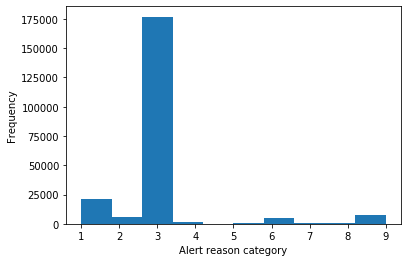

In [25]:
#data['alert reason category']
plt.hist(x_train['alert_reason_category'])
plt.xlabel('Alert reason category')
plt.ylabel('Frequency')

3rd category is most frequent

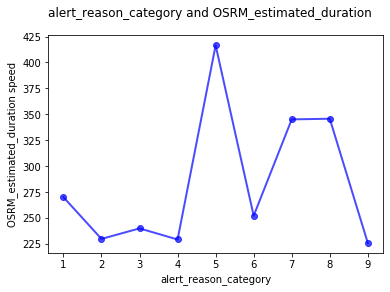

In [44]:
import matplotlib.pyplot as plt
plt.plot(x_train.groupby('alert_reason_category').mean()['OSRM_estimated_duration'], 'bo-', lw=2, alpha=0.7)
plt.xlabel('alert_reason_category')
plt.ylabel('OSRM_estimated_duration)
plt.suptitle('alert_reason_category and OSRM_estimated_duration')
plt.show()

For 5th category OSRM_estimated_duration in very high

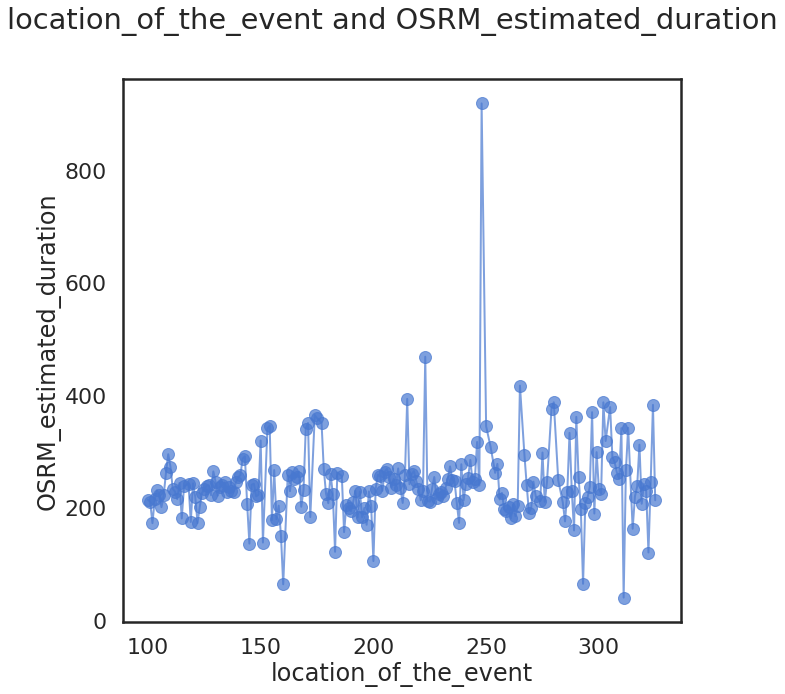

In [107]:
import matplotlib.pyplot as plt
plt.plot(x_train.groupby('location_of_the_event').mean()['OSRM_estimated_duration'], 'bo-', lw=2, alpha=0.7)

plt.xlabel('location_of_the_event')
plt.ylabel('OSRM_estimated_duration')
plt.suptitle('location_of_the_event and OSRM_estimated_duration')
plt.show()

For 250th location_of_the_event OSRM_estimated_duration in very high

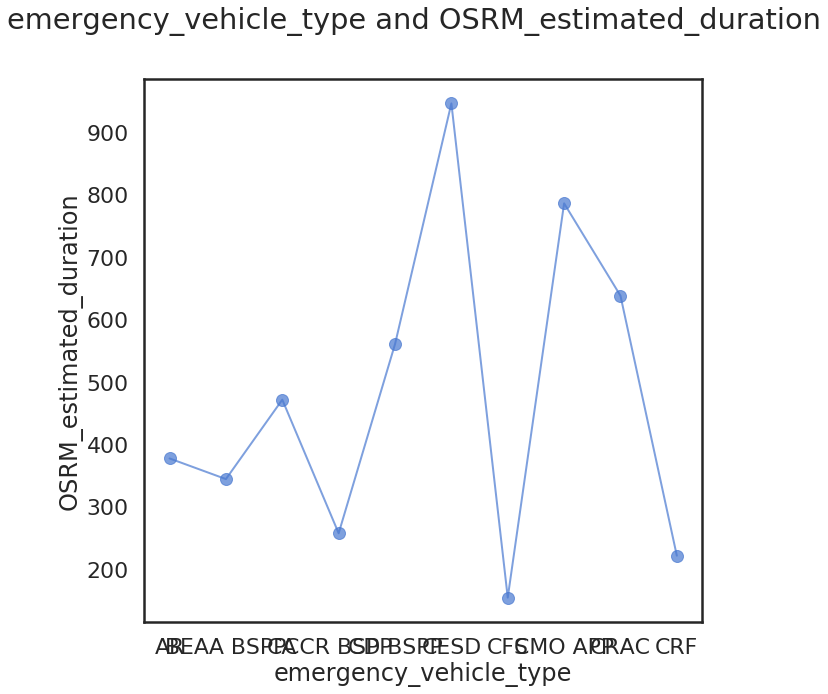

In [108]:
import matplotlib.pyplot as plt
plt.plot(x_train.groupby('emergency_vehicle_type').mean().head(10)['OSRM_estimated_duration'], 'bo-', lw=2, alpha=0.7)

plt.xlabel('emergency_vehicle_type')
plt.ylabel('OSRM_estimated_duration')
plt.suptitle('emergency_vehicle_type and OSRM_estimated_duration')
plt.show()


For CESD emergency_vehicle_type OSRM_estimated_duration in high

Text(0, 0.5, 'Frequency')

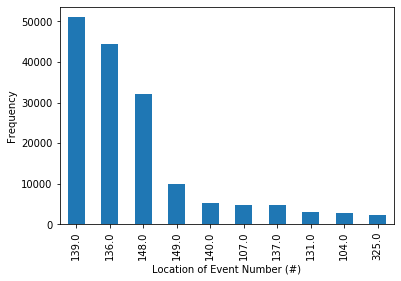

In [56]:
x_train['location_of_the_event'].value_counts().head(10).plot('bar')
plt.xlabel("Location of Event Number (#)")
plt.ylabel("Frequency")

Frequency of particular location_of_the_event 

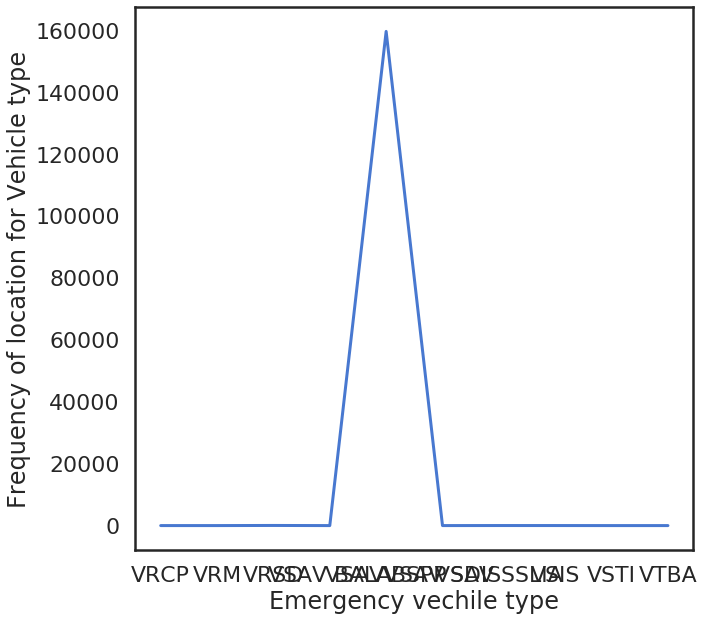

In [103]:
plt.plot(x_train.groupby('emergency_vehicle_type').count().tail(10)[['OSRM_estimated_duration']])
plt.xlabel('Emergency vechile type')
plt.ylabel('Frequency of location for Vehicle type')
plt.show()

VSAV BSPP vechile type is being used most of the times

In [66]:
x_test['emergency_vehicle_type'].value_counts().head(15)

VSAV BSPP    78555
PSE          16359
VLR BSPP      2728
FPT BSPP      1956
AR            1334
FA            1322
EPAN           975
EPA BSPP       959
CCR BSPP       706
CRF            678
FNPC           422
VID            362
BEAA BSPP      294
EPSA           253
CRAC           188
Name: emergency_vehicle_type, dtype: int64

In [69]:
x_test['rescue_center'].value_counts().head(20)

2475    3113
2477    2938
2447    2710
2463    2565
2488    2523
2446    2510
2469    2335
2474    2320
2497    2271
2478    2225
2442    2219
2486    2189
2460    2090
2491    2080
2441    2055
2439    2043
2449    1868
2436    1798
2443    1787
2510    1709
Name: rescue_center, dtype: int64

Frequency of particular rescue_center

In [72]:
import seaborn as sns
import datetime
x_train['m']=pd.to_datetime(x_train['date_key_selection'],format='%Y%m%d')


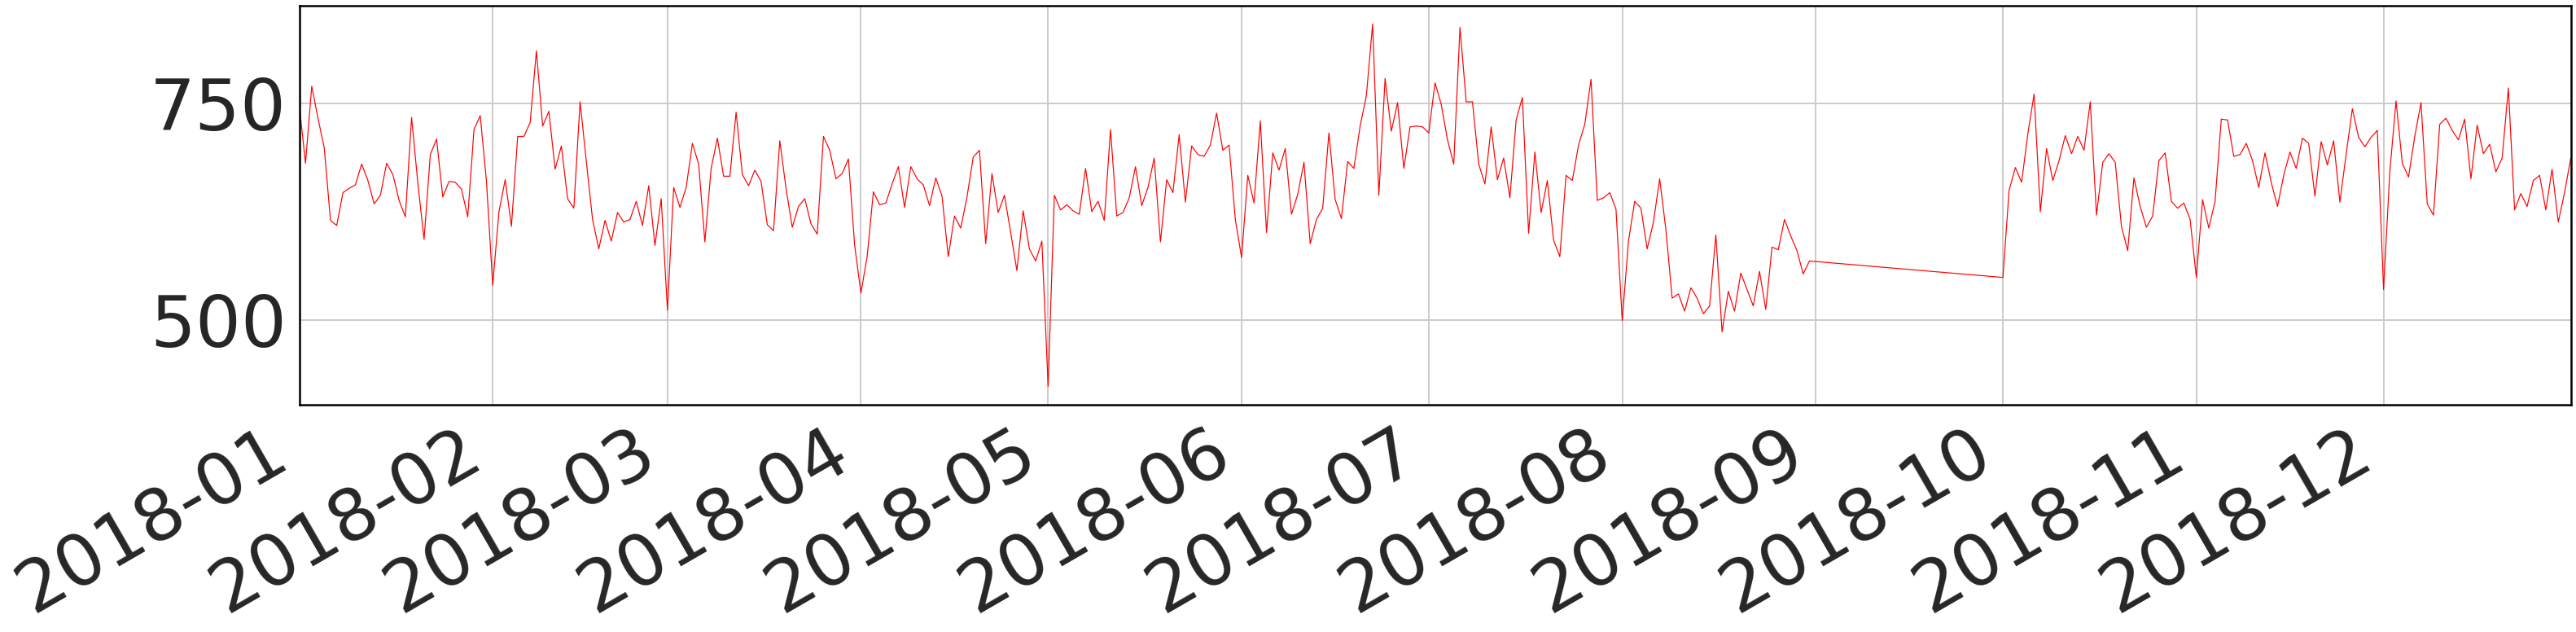

In [78]:
from pylab import rcParams
rcParams['figure.figsize'] = 50,10
sns.set_style("whitegrid", {'axes.edgecolor': '0'})
sns.set_context("poster", font_scale=4)
x_train.m.value_counts().plot(kind='line', linewidth=1.2, color='red')
x_train.drop('m',axis = 1, inplace = True)

Most of the accident where recorded during july

[Text(0.5, 0, 'emergency_vehicle_selection'),
 Text(1.5, 0, 'intervention'),
 Text(2.5, 0, 'alert_reason_category'),
 Text(3.5, 0, 'alert_reason'),
 Text(4.5, 0, 'intervention_on_public_roads'),
 Text(5.5, 0, 'floor'),
 Text(6.5, 0, 'location_of_the_event'),
 Text(7.5, 0, 'longitude_intervention'),
 Text(8.5, 0, 'latitude_intervention'),
 Text(9.5, 0, 'emergency_vehicle'),
 Text(10.5, 0, 'rescue_center'),
 Text(11.5, 0, 'date_key_selection'),
 Text(12.5, 0, 'time_key_selection'),
 Text(13.5, 0, 'delta_status_preceding_selection_selection'),
 Text(14.5, 0, 'departed_from_its_rescue_center'),
 Text(15.5, 0, 'longitude_before_departure'),
 Text(16.5, 0, 'latitude_before_departure'),
 Text(17.5, 0, 'delta_position_gps_previous_departure_departure'),
 Text(18.5, 0, 'OSRM_estimated_distance'),
 Text(19.5, 0, 'OSRM_estimated_duration')]

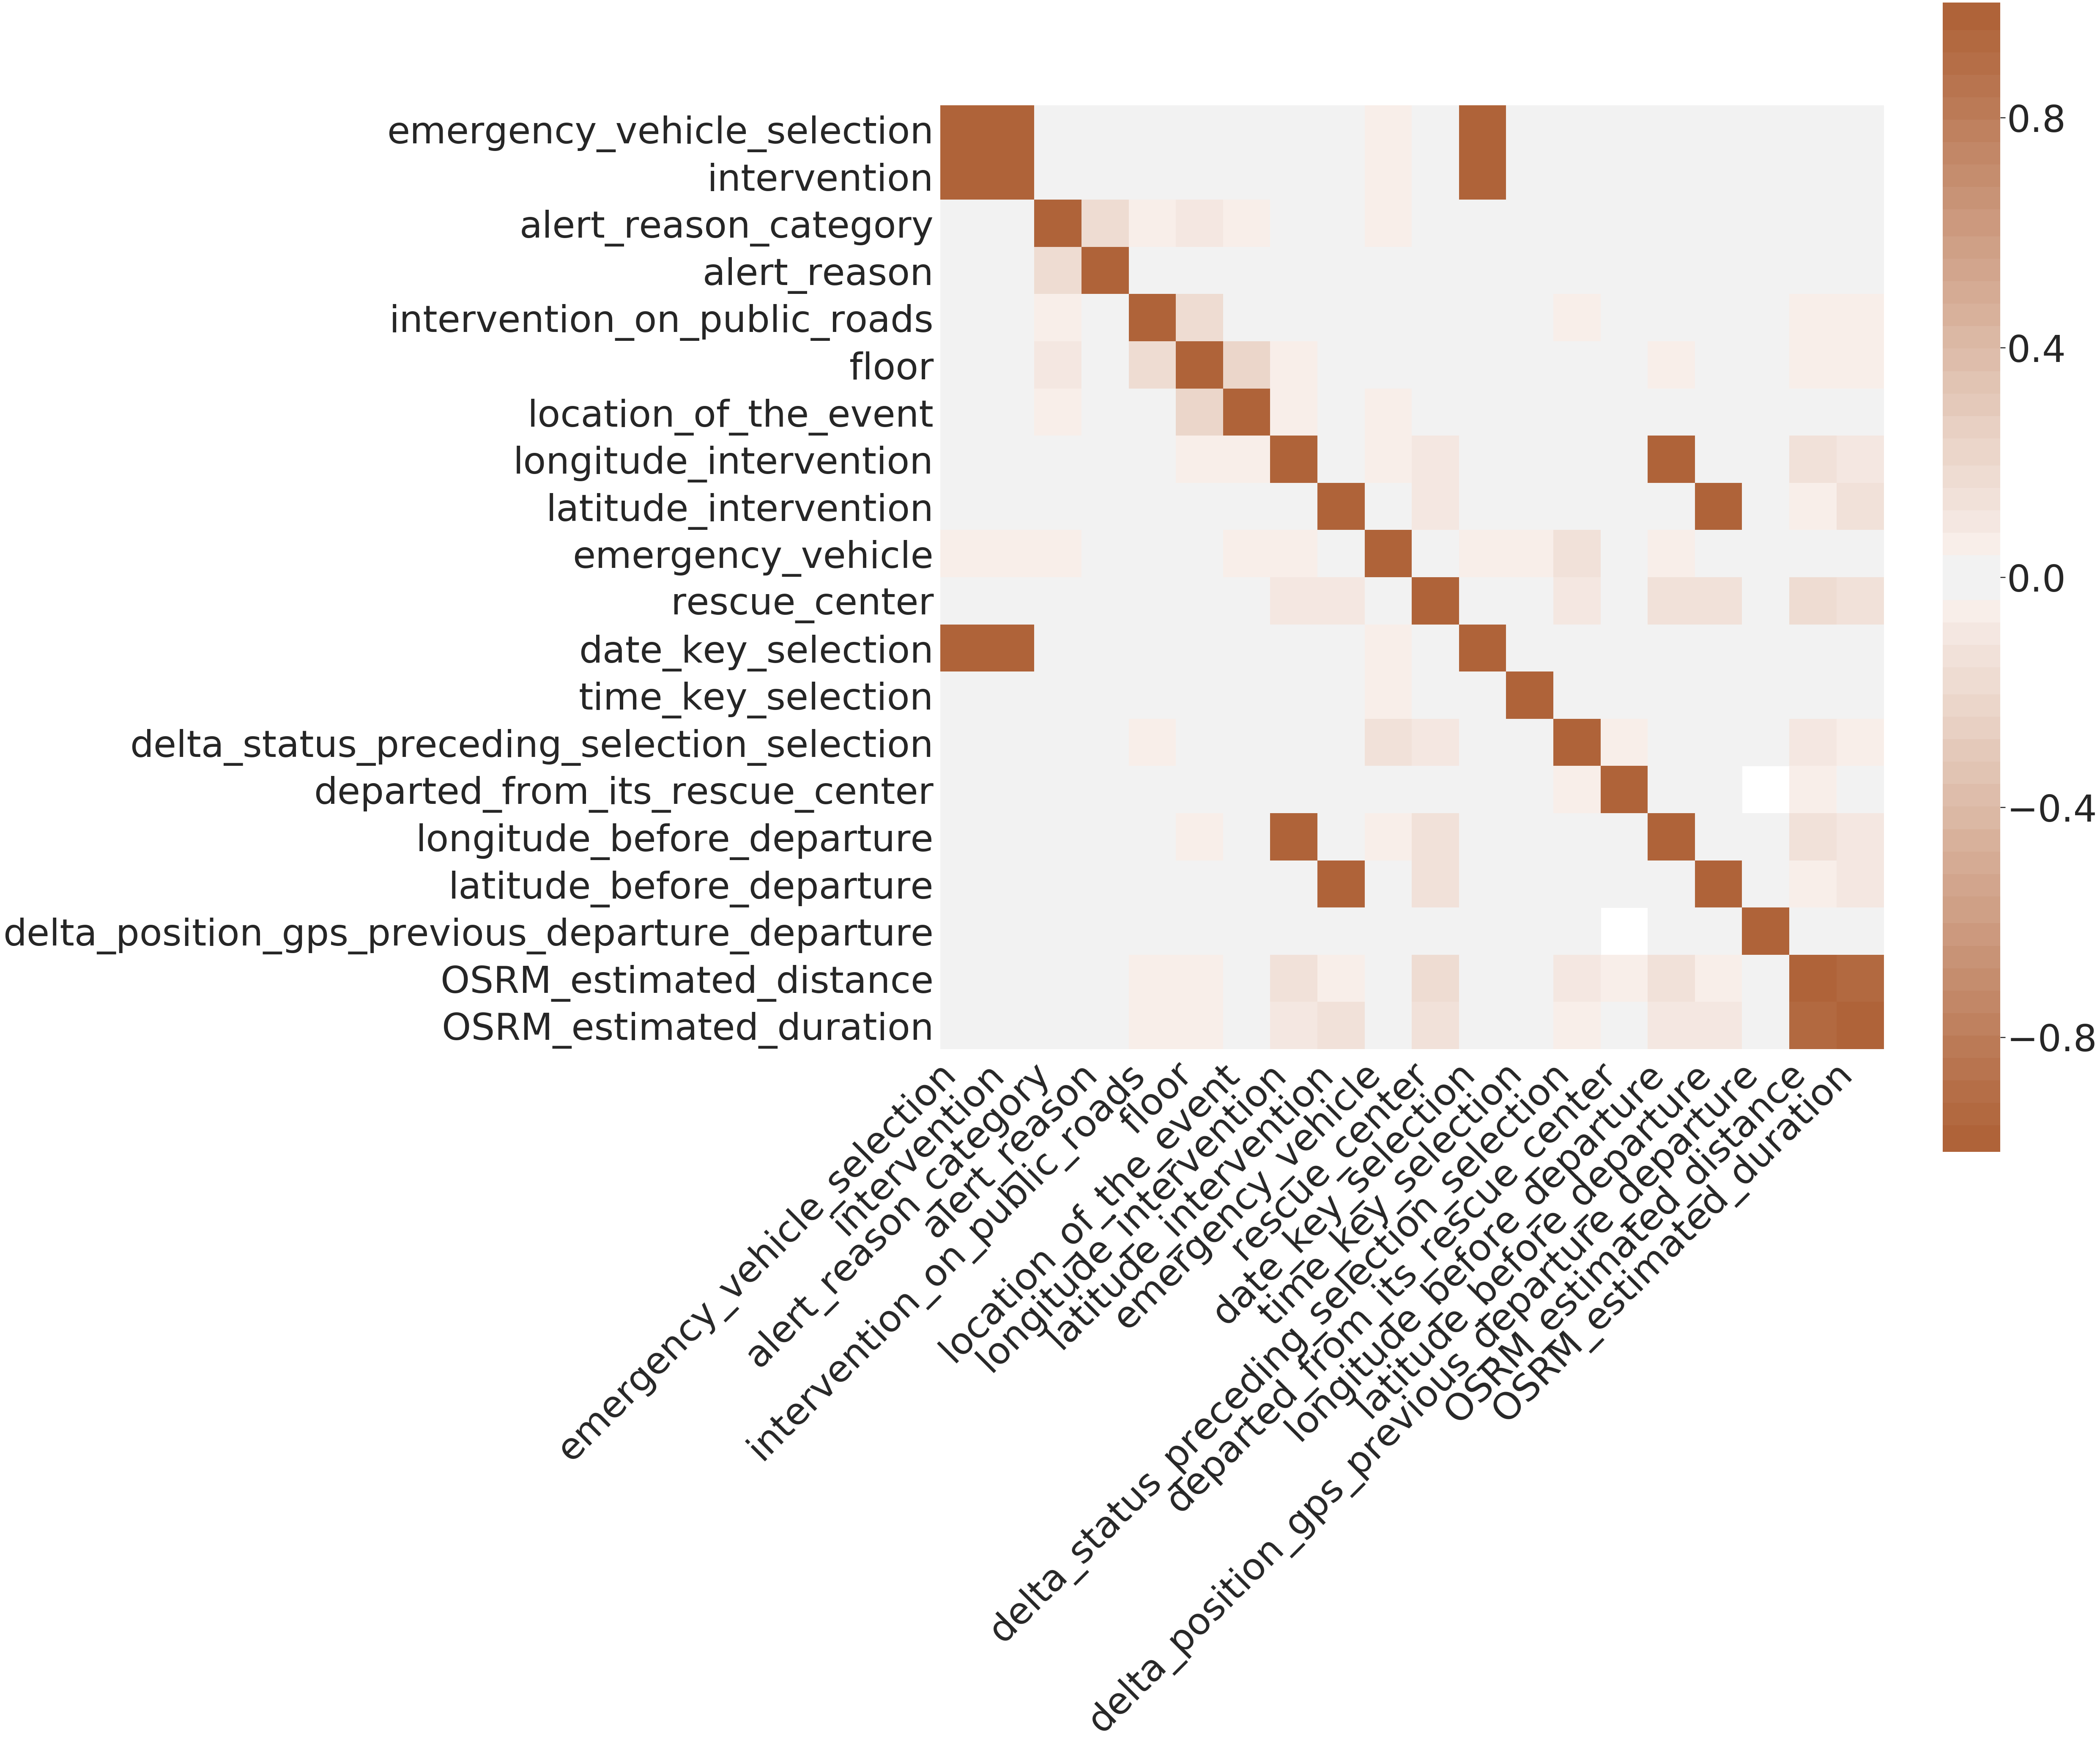

In [84]:
corr=x_train.corr()
rcParams['figure.figsize']=50,50
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(30, 30, n=50),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

Correlation matrix

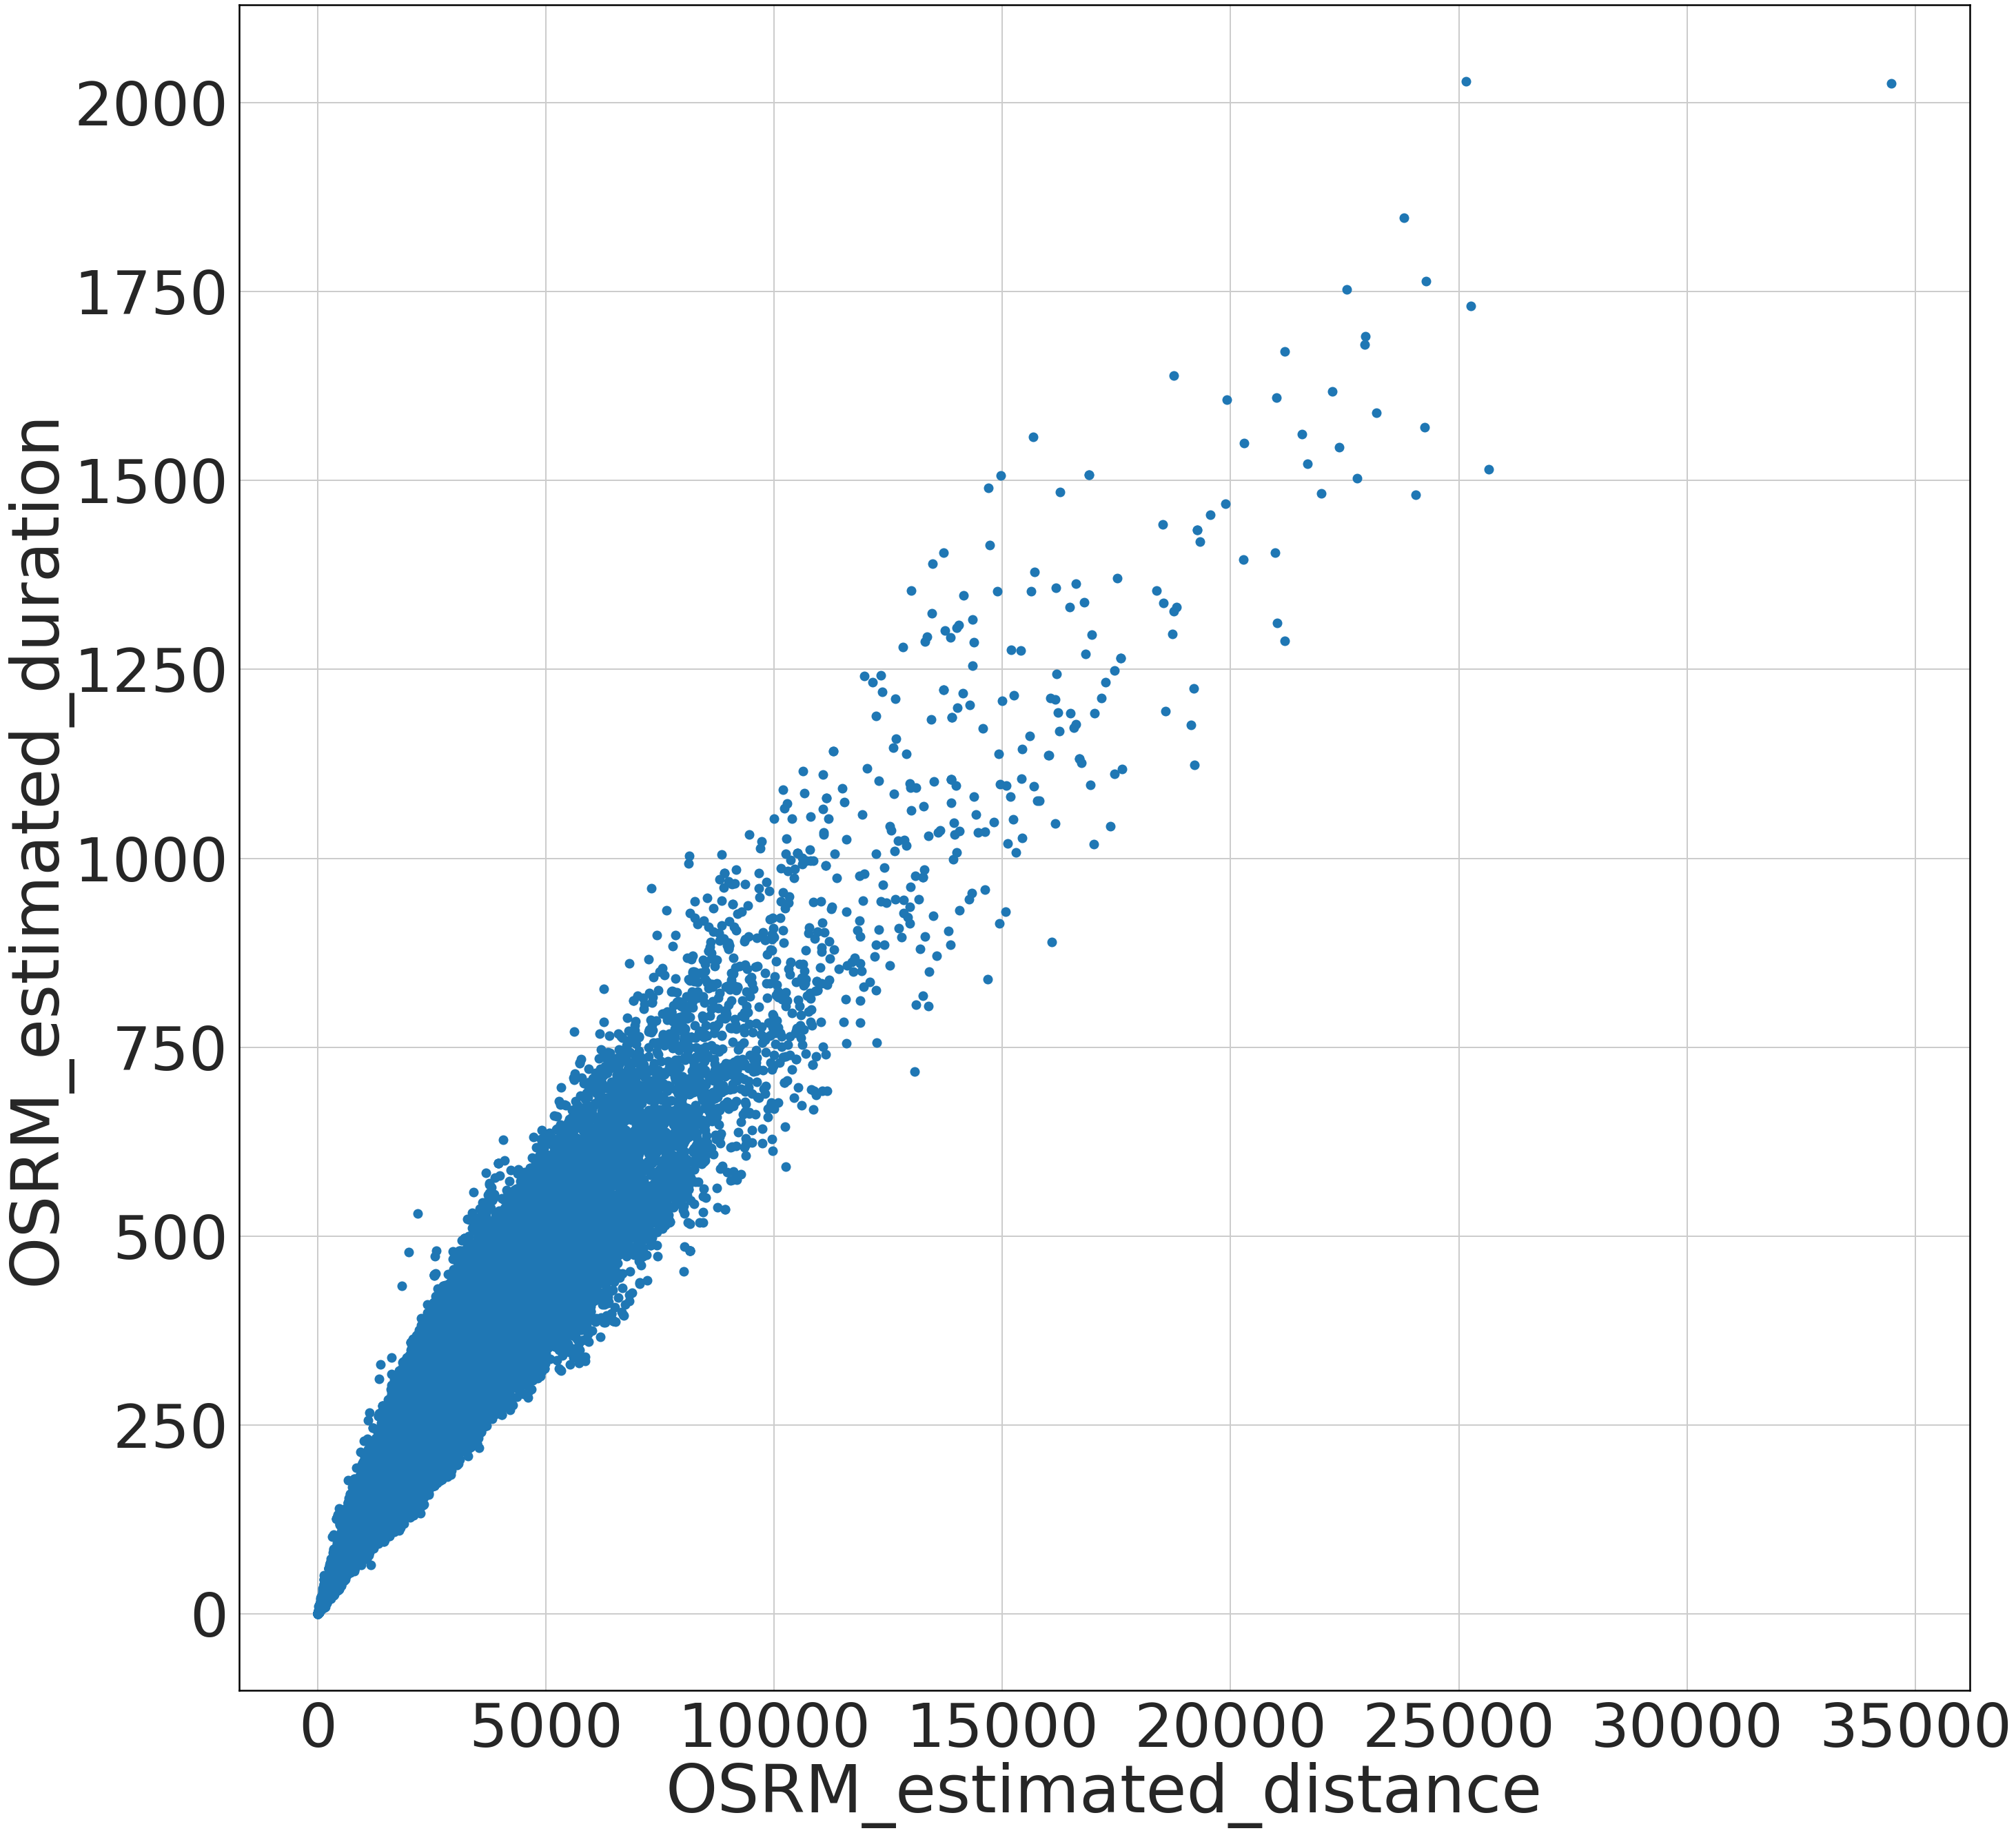

In [93]:
import matplotlib.pyplot as plt
rcParams['figure.figsize']=9,9
fig, ax = plt.subplots(figsize=(45,45))
ax.scatter(x_test['OSRM_estimated_distance'], x_test['OSRM_estimated_duration'])
ax.set_xlabel('OSRM_estimated_distance')
ax.set_ylabel('OSRM_estimated_duration')
plt.show()

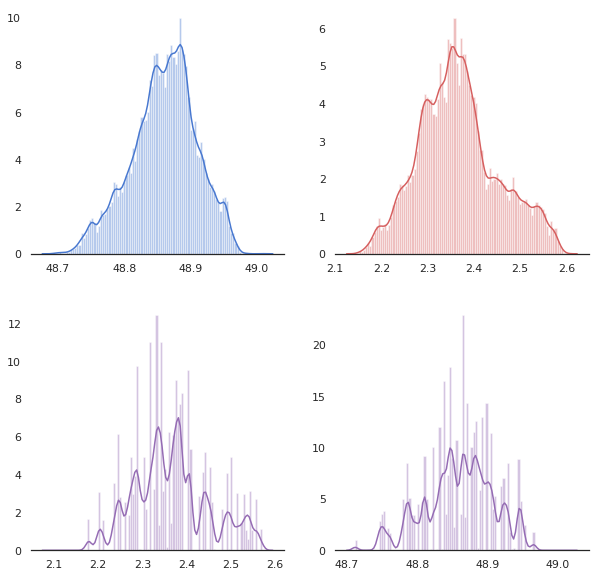

In [100]:
import seaborn as sns
rcParams['figure.figsize']=10,10
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)
sns.despine(left=True)
sns.distplot(x_train['latitude_intervention'].values, label = 'latitude_intervention',color="b",bins = 100, ax=axes[0,0])
sns.distplot(x_train['longitude_intervention'].values, label = 'longitude_intervention',color="r",bins =100, ax=axes[0,1])
sns.distplot(x_train['longitude_before_departure'].values, label = 'longitude_before_departure',color="m",bins =100, ax=axes[1, 0])
sns.distplot(x_train['latitude_before_departure'].values, label = 'latitude_before_departure',color="m",bins =100, ax=axes[1, 1])

we can see that most of the trips are getting concentrated between longitude 48.7 to 49.0 and latitude 2.1 to 2.6

Most accident took place on sunday

# Preprocessing

In [3]:
x_train = pd.read_csv('x_train.csv')
x_test = pd.read_csv('x_test.csv')
x_train_a = pd.read_csv('x_train_a.csv')
x_test_a = pd.read_csv('x_test_a.csv')
y_train=pd.read_csv('y_train.csv')
x_testm=x_test

Merging additional dataframe and original dataframe 

In [4]:
x_train=pd.merge(x_train, x_train_a, on='emergency_vehicle_selection')
x_test=pd.merge(x_test, x_test_a, on='emergency_vehicle_selection')

Finding null values in each column 

In [8]:
x_train_nan = (x_train.isnull().sum()/x_train.shape[0])*100
x_train_nan[x_train_nan>0]

location_of_the_event                                             5.794736
delta_position_gps_previous_departure_departure                  97.764627
GPS_tracks_departure_presentation                                69.998678
GPS_tracks_datetime_departure_presentation                       69.998678
OSRM_estimate_from_last_observed_GPS_position                    69.998678
OSRM_estimated_distance_from_last_observed_GPS_position          70.018738
OSRM_estimated_duration_from_last_observed_GPS_position          70.018738
time_elapsed_between_selection_and_last_observed_GPS_position    69.998678
updated_OSRM_estimated_duration                                  70.018738
dtype: float64

Filling null values

In [9]:
x_train['updated_OSRM_estimated_duration'].fillna(x_train['OSRM_estimated_duration'],inplace=True)

In [10]:
x_test['updated_OSRM_estimated_duration'].fillna(x_test['OSRM_estimated_duration'],inplace=True)

Null values of updated_OSRM_estimated_duration is filled with previous OSRM_estimated_duration

In [11]:
x_train['OSRM_estimated_distance_from_last_observed_GPS_position'].fillna(x_train['OSRM_estimated_distance'],inplace=True)

In [12]:
x_test['OSRM_estimated_distance_from_last_observed_GPS_position'].fillna(x_test['OSRM_estimated_distance'],inplace=True)

Null values of OSRM_estimated_distance_from_last_observed_GPS_position is filled with previous OSRM_estimated_distance

In [13]:
x_train.drop('OSRM_estimate_from_last_observed_GPS_position',axis = 1, inplace = True)

x_test.drop('OSRM_estimate_from_last_observed_GPS_position',axis = 1, inplace = True)

OSRM_estimate_from_last_observed_GPS_position droped because it is JSON object

In [14]:
x_train['OSRM_estimated_duration_from_last_observed_GPS_position'].fillna(x_train['OSRM_estimated_distance'],inplace=True)
x_test['OSRM_estimated_duration_from_last_observed_GPS_position'].fillna(x_test['OSRM_estimated_distance'],inplace=True)

In [15]:
x_train['time_elapsed_between_selection_and_last_observed_GPS_position'].mean()

462.2899801379838

In [16]:
x_train['time_elapsed_between_selection_and_last_observed_GPS_position'].mean()

462.2899801379838

In [17]:
x_train['time_elapsed_between_selection_and_last_observed_GPS_position'].fillna(462,inplace=True)
x_test['time_elapsed_between_selection_and_last_observed_GPS_position'].fillna(462,inplace=True)

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,random_state = 1,test_size=0.3)

In [19]:
x_train1=x_train
x_test1=x_test
y_train1=y_train

Finding outliers of longitude_intervention

13880

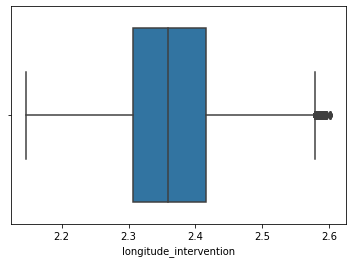

In [20]:
import seaborn as sns
sns.boxplot(x_train['longitude_intervention'])
sum(x_train.longitude_intervention[x_train.longitude_intervention>2.5].value_counts())

date_key_selection before changing to date_time format

In [21]:
x_train['date_key_selection'].head()

194832    20181112
47925     20180629
144359    20180202
208311    20181119
168305    20180716
Name: date_key_selection, dtype: int64

In [22]:
import datetime
x_train['date_key_selection']=pd.to_datetime(x_train['date_key_selection'],format='%Y%m%d')
x_test['date_key_selection']=pd.to_datetime(x_test['date_key_selection'],format='%Y%m%d')

Changing date_key_selection to date_time format

In [23]:
x_train['date_key_selection'].head()

194832   2018-11-12
47925    2018-06-29
144359   2018-02-02
208311   2018-11-19
168305   2018-07-16
Name: date_key_selection, dtype: datetime64[ns]

In [24]:
x_test['date_key_selection'].head()

151918   2018-10-13
25534    2018-06-02
139751   2018-03-13
126194   2018-08-20
59358    2018-05-04
Name: date_key_selection, dtype: datetime64[ns]

Extacting month from date_key_selection

In [25]:
x_train['month'] = x_train['date_key_selection'].dt.month
x_test['month'] = x_test['date_key_selection'].dt.month

Extacting weekday from date_key_selection

In [27]:
x_train=x_train.drop(['time_key_selection'], axis=1)
x_test=x_test.drop(['time_key_selection'], axis=1)

In [28]:
x_train=x_train.drop(['time'], axis=1)
x_test=x_test.drop(['time'], axis=1)

In [29]:
x_train=x_train.drop(['selection_time'], axis=1)
x_test=x_test.drop(['selection_time'], axis=1)
print("Droped selection_time after extracting time column")

Droped selection_time after extracting time column


In [30]:
x_train.drop('status_preceding_selection',axis = 1, inplace = True)
x_test.drop('status_preceding_selection',axis = 1, inplace = True)
print("Status_preceding_selection and departed_from_its_rescue_centre are giving us the same meaning so droped status_preceding_selection")

Status_preceding_selection and departed_from_its_rescue_centre are giving us the same meaning so droped status_preceding_selection


In [31]:
x_train_nan = (x_train.isnull().sum()/x_train.shape[0])*100
x_train_nan[x_train_nan>0]

location_of_the_event                               5.799980
delta_position_gps_previous_departure_departure    97.751653
GPS_tracks_departure_presentation                  70.051128
GPS_tracks_datetime_departure_presentation         70.051128
dtype: float64

In [32]:
x_test_nan = (x_test.isnull().sum()/x_test.shape[0])*100
x_test_nan[x_test_nan>0]

location_of_the_event                               5.782499
delta_position_gps_previous_departure_departure    97.794900
GPS_tracks_departure_presentation                  69.876296
GPS_tracks_datetime_departure_presentation         69.876296
dtype: float64

Dropping column having null values above 69 persent

In [33]:
x_train.drop('delta_position_gps_previous_departure_departure',axis = 1, inplace = True)
x_test.drop('delta_position_gps_previous_departure_departure',axis = 1, inplace = True)
print(" Droped delta_position_gps_previous_departure_departure because it had 97% NULL tuples")

 Droped delta_position_gps_previous_departure_departure because it had 97% NULL tuples


In [34]:
x_train.drop('GPS_tracks_departure_presentation',axis = 1, inplace = True)
x_test.drop('GPS_tracks_departure_presentation',axis = 1, inplace = True)
print(" Droped GPS_tracks_departure_presentation because it had 70% NULL tuples")

 Droped GPS_tracks_departure_presentation because it had 70% NULL tuples


In [35]:
x_train.drop('GPS_tracks_datetime_departure_presentation',axis = 1, inplace = True)
x_test.drop('GPS_tracks_datetime_departure_presentation',axis = 1, inplace = True)
print(" Droped GPS_tracks_datetime_departure_presentation because it had 70% NULL tuples")

 Droped GPS_tracks_datetime_departure_presentation because it had 70% NULL tuples


Text(0, 0.5, 'Emergency vechile selection')

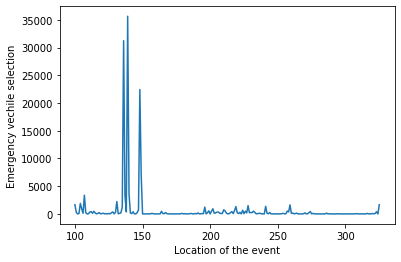

In [36]:
plt.plot(x_train.groupby('location_of_the_event').count()[['emergency_vehicle_selection']])
plt.xlabel('Location of the event')
plt.ylabel('Emergency vechile selection')
#inference- at 139 location of event maximum no of times emergency vechile selection is done

In [37]:
x_train['location_of_the_event'].fillna(139,inplace=True)
x_test['location_of_the_event'].fillna(139,inplace=True)

Filling nan values in location_of_the_event column with 139

In [38]:
x_train_nan = (x_train.isnull().sum()/x_train.shape[0])*100
x_train_nan[x_train_nan>0]

Series([], dtype: float64)

In [39]:
pd.isnull(x_train).sum()

emergency_vehicle_selection                                      0
intervention                                                     0
alert_reason_category                                            0
alert_reason                                                     0
intervention_on_public_roads                                     0
floor                                                            0
location_of_the_event                                            0
longitude_intervention                                           0
latitude_intervention                                            0
emergency_vehicle                                                0
emergency_vehicle_type                                           0
rescue_center                                                    0
date_key_selection                                               0
delta_status_preceding_selection_selection                       0
departed_from_its_rescue_center                               

In [40]:
pd.isnull(x_test).sum()

emergency_vehicle_selection                                      0
intervention                                                     0
alert_reason_category                                            0
alert_reason                                                     0
intervention_on_public_roads                                     0
floor                                                            0
location_of_the_event                                            0
longitude_intervention                                           0
latitude_intervention                                            0
emergency_vehicle                                                0
emergency_vehicle_type                                           0
rescue_center                                                    0
date_key_selection                                               0
delta_status_preceding_selection_selection                       0
departed_from_its_rescue_center                               

In [41]:
x_train.drop('OSRM_response',axis = 1, inplace = True)
x_test.drop('OSRM_response',axis = 1, inplace = True)

In [42]:
x_train.drop('date_key_selection',axis = 1, inplace = True)
x_test.drop('date_key_selection',axis = 1, inplace = True)

In [45]:
x_train.drop('intervention',axis = 1, inplace = True)
x_test.drop('intervention',axis = 1, inplace = True)

Extracting speed feature

In [47]:
x_train['speed'] = x_train['updated_OSRM_estimated_duration']/x_train['OSRM_estimated_distance']
x_test['speed'] = x_test['updated_OSRM_estimated_duration']/x_test['OSRM_estimated_distance']
x_train['speed']=x_train['speed']*100
x_test['speed']=x_test['speed']*100
x_train['speed'] = x_train['speed'].astype(np.int64)
x_test['speed'] = x_test['speed'].astype(np.int64)

In [48]:
x_train_transit = x_train
x_test_transit = x_test
y_train_transit = y_train

In [49]:
x_train_transit1 = x_train
x_test_transit1 = x_test

In [50]:
x_train_transit2 = x_train
x_test_transit2 = x_test

In [51]:
x_train_transit.shape

(153535, 22)

In [52]:
pd.isnull(x_test).sum()

alert_reason_category                                            0
alert_reason                                                     0
intervention_on_public_roads                                     0
floor                                                            0
location_of_the_event                                            0
longitude_intervention                                           0
latitude_intervention                                            0
emergency_vehicle_type                                           0
rescue_center                                                    0
delta_status_preceding_selection_selection                       0
departed_from_its_rescue_center                                  0
longitude_before_departure                                       0
latitude_before_departure                                        0
OSRM_estimated_distance                                          0
OSRM_estimated_distance_from_last_observed_GPS_position       

In [53]:
pd.isnull(x_train).sum()

alert_reason_category                                            0
alert_reason                                                     0
intervention_on_public_roads                                     0
floor                                                            0
location_of_the_event                                            0
longitude_intervention                                           0
latitude_intervention                                            0
emergency_vehicle_type                                           0
rescue_center                                                    0
delta_status_preceding_selection_selection                       0
departed_from_its_rescue_center                                  0
longitude_before_departure                                       0
latitude_before_departure                                        0
OSRM_estimated_distance                                          0
OSRM_estimated_distance_from_last_observed_GPS_position       

In [54]:
x_train.shape

(153535, 22)

In [55]:
x_test.shape

(65802, 22)

Changing dtype of categorical features

In [57]:
x_train_transit1.drop('floor',axis = 1, inplace = True)
x_test_transit1.drop('floor',axis = 1, inplace = True)
x_train_transit1.drop('speed',axis = 1, inplace = True)
x_test_transit1.drop('speed',axis = 1, inplace = True)
x_train_transit1.drop('rescue_center',axis = 1, inplace = True)
x_test_transit1.drop('rescue_center',axis = 1, inplace = True)

In [58]:
x_train_transit2 = x_train_transit2.astype({"emergency_vehicle_type":'category'})
x_test_transit2 = x_test_transit2.astype({"emergency_vehicle_type":'category'})
x_train_transit2 = x_train_transit2.astype({"location_of_the_event":'category'})
x_test_transit2 = x_test_transit2.astype({"location_of_the_event":'category'})
x_train_transit2 = x_train_transit2.astype({"alert_reason":'category'})
x_test_transit2 = x_test_transit2.astype({"alert_reason":'category'})
x_train_transit2 = x_train_transit2.astype({"month":'category'})
x_test_transit2 = x_test_transit2.astype({"month":'category'})
x_train_transit2 = x_train_transit2.astype({"weekday":'category'})
x_test_transit2 = x_test_transit2.astype({"weekday":'category'})

Dummy encoding on test and train data

In [62]:
x_train_transit1=pd.get_dummies(x_train_transit1)
x_test_transit1=pd.get_dummies(x_test_transit1)

In [63]:
x_train_transit2=pd.get_dummies(x_train_transit2)
x_test_transit2=pd.get_dummies(x_test_transit2)

In [66]:
x_train_transit1.shape,x_test_transit1.shape

((153535, 232), (65802, 232))

In [67]:
x_train_transit2.shape,x_test_transit2.shape

((153535, 515), (65802, 515))

# LinearRegression

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# Create a predictive model for the 'delta departure-presentation'
polynomial_features= PolynomialFeatures(degree=1)
x_train_transit_poly = polynomial_features.fit_transform(x_train_transit2)
model = LinearRegression()
model.fit(x_train_transit_poly, y_train_transit)

# Prediction of the 'delta selection-presentation'
x_transit_test_poly = polynomial_features.fit_transform(x_test_transit2)
y_selection_presentation_predicted = y_train['delta_selection_departure'].median() + model.predict(x_transit_test_poly)

In [69]:
# Create a submission file
submission = pd.concat([pd.DataFrame(x_test1[['emergency_vehicle_selection']].values), \
           pd.DataFrame(np.full((len(x_test1), 1), y_train1['delta_selection_departure'].median())), \
           pd.DataFrame(model.predict(x_transit_test_poly)), \
           pd.DataFrame(y_selection_presentation_predicted)], \
           axis=1)


In [70]:
submission1=submission.iloc[: , [0, 3, 4,5 ]]
submission1.columns = list(y_train.columns.values)

submission1.set_index('emergency_vehicle_selection', inplace=True)

In [71]:
observed_values=y_test['delta_selection_departure']

In [72]:
predited_values=submission1['delta_selection_departure']

In [73]:
from sklearn.metrics import r2_score
x=r2_score(observed_values,predited_values)
print('R2 score of delta_selection_departure for test data=',x)

R2 score of delta_selection_departure for test data= 0.08482537097086884


In [74]:
y2=pd.DataFrame(model.predict(x_train_transit_poly))

In [75]:
observed_values=y_train_transit['delta_selection_departure']
predited_values=y2[1]
from sklearn.metrics import r2_score
x=r2_score(observed_values,predited_values)
print('R2 score of delta_selection_departure for train data=',x)

R2 score of delta_selection_departure for train data= 0.16660533219511975


# Ridge

In [76]:
# Create a predictive model for the 'delta departure-presentation'
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import xgboost as xgb
model = Ridge(alpha=75)
model.fit(x_train_transit2, y_train_transit)
y_selection_presentation_predicted = y_train['delta_selection_departure'].median() + model.predict(x_test_transit2)

In [77]:
# Create a submission file
submission = pd.concat([pd.DataFrame(x_test1[['emergency_vehicle_selection']].values), \
           pd.DataFrame(np.full((len(x_test1), 1), y_train1['delta_selection_departure'].median())), \
           pd.DataFrame(model.predict(x_test_transit2)), \
           pd.DataFrame(y_selection_presentation_predicted)], \
           axis=1)


In [78]:
submission1=submission.iloc[: , [0, 3, 4,5 ]]
submission1.columns = list(y_train.columns.values)

submission1.set_index('emergency_vehicle_selection', inplace=True)

In [79]:
observed_values=y_test['delta_selection_departure']

In [80]:
predited_values=submission1['delta_selection_departure']

In [81]:
from sklearn.metrics import r2_score
x=r2_score(observed_values,predited_values)
print('R2 score of delta_selection_departure for test data=',x)

R2 score of delta_selection_departure for test data= 0.12504583023338722


In [82]:
y2=pd.DataFrame(model.predict(x_train_transit2))

In [83]:
observed_values=y_train_transit['delta_selection_departure']
predited_values=y2[1]
from sklearn.metrics import r2_score
x=r2_score(observed_values,predited_values)
print('R2 score of delta_selection_departure for train data=',x)

R2 score of delta_selection_departure for train data= 0.14825112280677133


# Light GBM

In [167]:
import lightgbm as lgb

In [168]:
lgb_train=lgb.Dataset(x_train_transit1,y_train_transit.delta_selection_departure)
lgb_valid = lgb.Dataset(x_test_transit1, y_test.delta_selection_departure, reference=lgb_train)

In [169]:
param = {}

In [174]:
num_round=15
lgbm1=lgb.train(param,lgb_train,num_round,
               valid_sets=[lgb_train, lgb_valid],
               verbose_eval=10)

[10]	training's l1: 38.43	valid_1's l1: 38.821
[20]	training's l1: 36.2699	valid_1's l1: 36.8891
[30]	training's l1: 35.1692	valid_1's l1: 36.0265
[40]	training's l1: 34.5198	valid_1's l1: 35.6024
[50]	training's l1: 34.0026	valid_1's l1: 35.3064
[60]	training's l1: 33.6038	valid_1's l1: 35.1503
[70]	training's l1: 33.2656	valid_1's l1: 35.0337
[80]	training's l1: 32.9911	valid_1's l1: 34.9438
[90]	training's l1: 32.7498	valid_1's l1: 34.9091
[100]	training's l1: 32.4881	valid_1's l1: 34.8462
[110]	training's l1: 32.2708	valid_1's l1: 34.823
[120]	training's l1: 32.0896	valid_1's l1: 34.8039
[130]	training's l1: 31.9264	valid_1's l1: 34.7964
[140]	training's l1: 31.7716	valid_1's l1: 34.7966
[150]	training's l1: 31.617	valid_1's l1: 34.7958
[160]	training's l1: 31.481	valid_1's l1: 34.7898
[170]	training's l1: 31.3202	valid_1's l1: 34.7876
[180]	training's l1: 31.177	valid_1's l1: 34.7931
[190]	training's l1: 31.0335	valid_1's l1: 34.7923
[200]	training's l1: 30.8868	valid_1's l1: 34.8

Plotting metrics recorded during training...


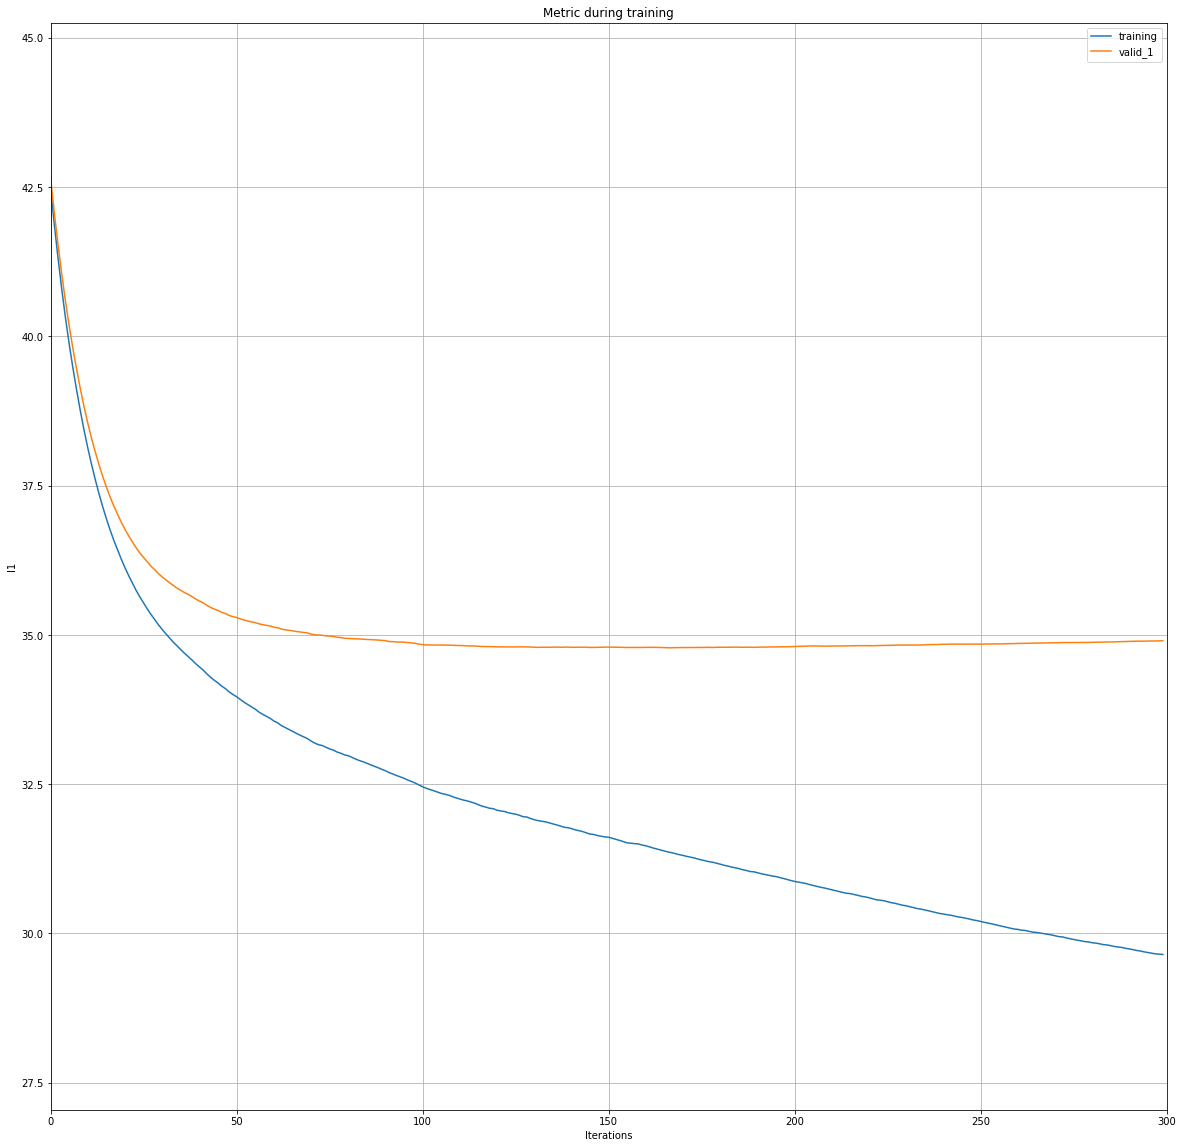

In [180]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,20
print('Plotting metrics recorded during training...')
ax = lgb.plot_metric(evals_result, metric='l1')
plt.show()

In [172]:
num_round=10
cv_results = lgb.cv(param, lgb_train, num_round, nfold=5, 
                    verbose_eval=20)

/home/yashas/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


[20]	cv_agg's l1: 36.8154 + 0.39624
[40]	cv_agg's l1: 35.572 + 0.332136
[60]	cv_agg's l1: 35.1795 + 0.295913
[80]	cv_agg's l1: 35.0278 + 0.276981
[100]	cv_agg's l1: 34.9398 + 0.259282


In [173]:
print('Best CV score:', cv_results['l1-mean'][-1])

Best CV score: 34.93977476420092


In [135]:
y1=pd.DataFrame(lgbm1.predict(x_test_transit1))

In [136]:
y1.head()

,0
0,113.269149
1,107.215420
2,182.910248
3,140.894352
4,123.552269


In [181]:
lgb_train=lgb.Dataset(x_train_transit2,y_train_transit.delta_departure_presentation)
lgb_valid = lgb.Dataset(x_test_transit2, y_test.delta_departure_presentation, reference=lgb_train)
evals_result = {}

In [182]:
param = {}

In [183]:
num_round=30
lgbm2=lgb.train(param,lgb_train,num_round,
               valid_sets=[lgb_train, lgb_valid],
               evals_result=evals_result,
               verbose_eval=10)

[10]	training's l1: 109.364	valid_1's l1: 109.858
[20]	training's l1: 95.3181	valid_1's l1: 96.5588
[30]	training's l1: 88.305	valid_1's l1: 90.2591
[40]	training's l1: 84.6505	valid_1's l1: 87.3005
[50]	training's l1: 82.5145	valid_1's l1: 85.7946
[60]	training's l1: 81.0851	valid_1's l1: 85.006
[70]	training's l1: 80.0653	valid_1's l1: 84.5552
[80]	training's l1: 79.2642	valid_1's l1: 84.3122
[90]	training's l1: 78.6383	valid_1's l1: 84.1174
[100]	training's l1: 78	valid_1's l1: 83.929
[110]	training's l1: 77.4549	valid_1's l1: 83.8443
[120]	training's l1: 77.0704	valid_1's l1: 83.8174
[130]	training's l1: 76.6063	valid_1's l1: 83.742
[140]	training's l1: 76.2196	valid_1's l1: 83.718
[150]	training's l1: 75.8388	valid_1's l1: 83.6802
[160]	training's l1: 75.4859	valid_1's l1: 83.6568
[170]	training's l1: 75.1111	valid_1's l1: 83.635
[180]	training's l1: 74.7924	valid_1's l1: 83.6495
[190]	training's l1: 74.4498	valid_1's l1: 83.6376
[200]	training's l1: 74.1151	valid_1's l1: 83.5984


Plotting metrics recorded during training...


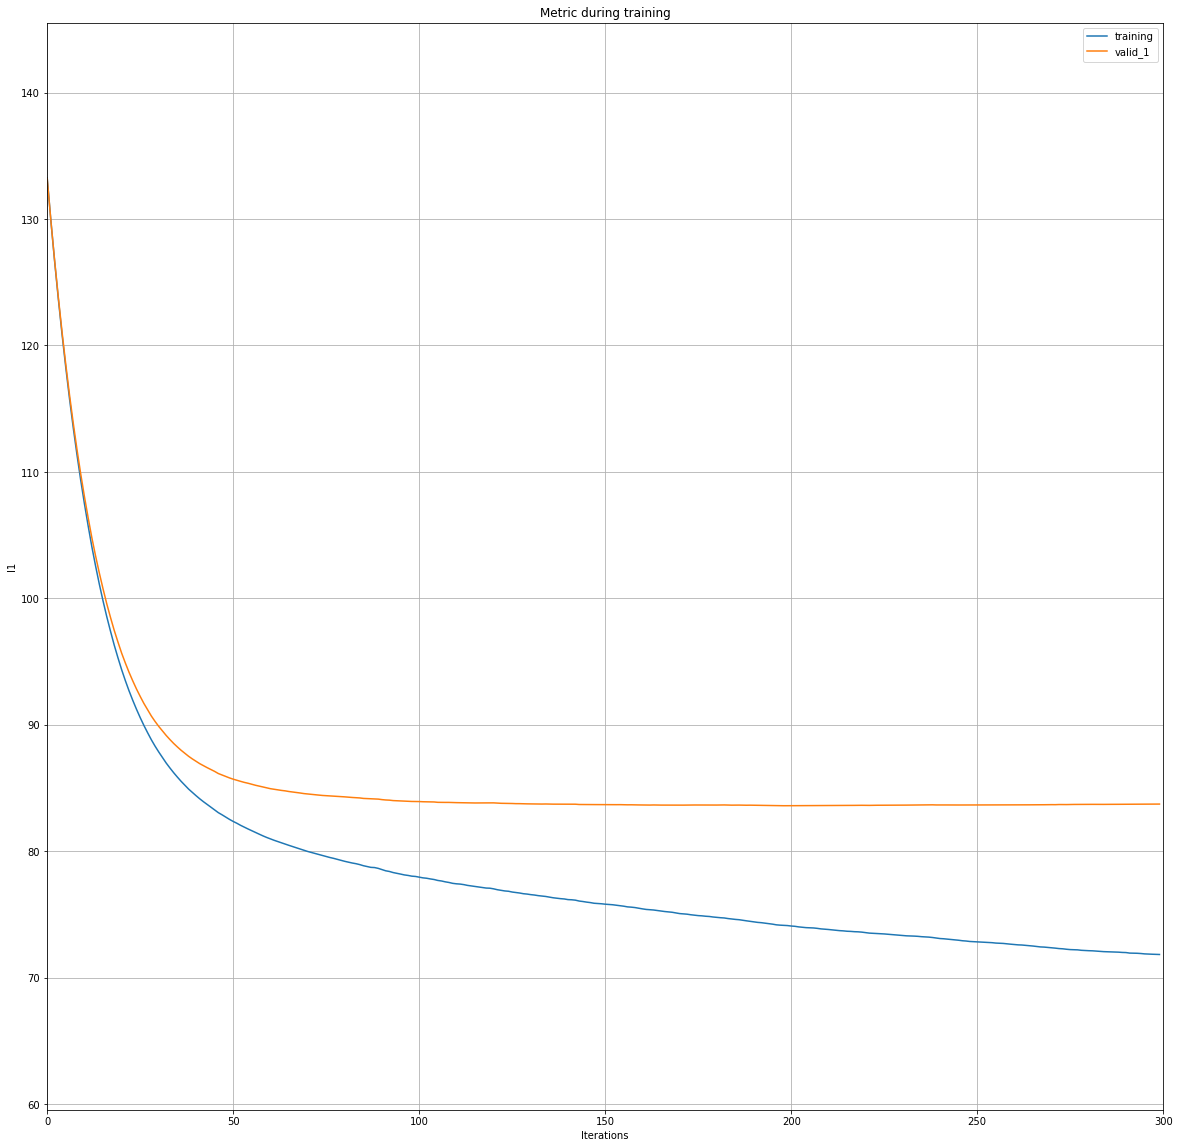

In [184]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,20
print('Plotting metrics recorded during training...')
ax = lgb.plot_metric(evals_result, metric='l1')
plt.show()

In [141]:
y2=pd.DataFrame(lgbm2.predict(x_test_transit2))

In [142]:
y2.head()

,0
0,302.221803
1,314.077237
2,280.933291
3,365.136471
4,249.847735


In [143]:
y3=y1[0]+y2[0] 

In [144]:
y3= pd.DataFrame(y3)

In [145]:
y3.head()

,0
0,415.490952
1,421.292656
2,463.843539
3,506.030823
4,373.400004


In [146]:
y_train.head()

,emergency_vehicle_selection,delta_selection_departure,delta_departure_presentation,delta_selection_presentation
194832,5356494,174,544,718
47925,5080905,214,270,484
144359,4782304,180,219,399
208311,5370873,78,1841,1919
168305,5124458,87,366,453


In [147]:
y1['delta_selection_departure']=y1[0]

In [148]:
y1['delta_departure_presentation']=y2[0]

In [149]:
y1['delta_selection_presentation']=y3

In [150]:
y1=y1.drop([0], axis=1)

In [151]:
y1.head()

,delta_selection_departure,delta_departure_presentation,delta_selection_presentation
0,113.269149,302.221803,415.490952
1,107.215420,314.077237,421.292656
2,182.910248,280.933291,463.843539
3,140.894352,365.136471,506.030823
4,123.552269,249.847735,373.400004


In [152]:
y1['emergency_vehicle_selection']=pd.DataFrame(x_test1[['emergency_vehicle_selection']].values)

In [153]:
y1.set_index('emergency_vehicle_selection', inplace=True)

In [154]:
y1.to_csv('./submissionxgb.csv', sep=",")

In [155]:
y1.head()

,delta_selection_departure,delta_departure_presentation,delta_selection_presentation
emergency_vehicle_selection,,,
5296261,113.269149,302.221803,415.490952
5024632,107.215420,314.077237,421.292656
4858429,182.910248,280.933291,463.843539
5190157,140.894352,365.136471,506.030823
4958840,123.552269,249.847735,373.400004


In [156]:
observed_values=y_test['delta_selection_departure']
predited_values=y1['delta_selection_departure']
from sklearn.metrics import r2_score
x=r2_score(observed_values,predited_values)
print('R2 score of delta_selection_departure for test data=',x)

R2 score of delta_selection_departure for test data= 0.18061962950398291


In [157]:
observed_values=y_test['delta_departure_presentation']
predited_values=y1['delta_departure_presentation']
from sklearn.metrics import r2_score
x=r2_score(observed_values,predited_values)
print('R2 score of delta_departure_presentation for test data=',x)

R2 score of delta_departure_presentation for test data= 0.3800237869881298


In [158]:
observed_values=y_test['delta_selection_presentation']
predited_values=y1['delta_selection_presentation']
from sklearn.metrics import r2_score
x=r2_score(observed_values,predited_values)
print('R2 score of delta_selection_presentation for test data=',x)

R2 score of delta_selection_presentation for test data= 0.3970210265588394


In [159]:
y1=pd.DataFrame(lgbm1.predict(x_train_transit1))

In [160]:
observed_values=y_train_transit['delta_selection_departure']
predited_values=y1
from sklearn.metrics import r2_score
x=r2_score(observed_values,predited_values)
print('R2 score of delta_selection_presentation for train data=',x)

R2 score of delta_selection_presentation for train data= 0.2927517304248458


In [161]:
y2=pd.DataFrame(lgbm2.predict(x_train_transit2))

In [162]:
observed_values=y_train_transit['delta_departure_presentation']
predited_values=y2
from sklearn.metrics import r2_score
x=r2_score(observed_values,predited_values)
print('R2 score of delta_departure_presentation for train data=',x)

R2 score of delta_departure_presentation for train data= 0.522584208992056


In [163]:
52.25

52.25

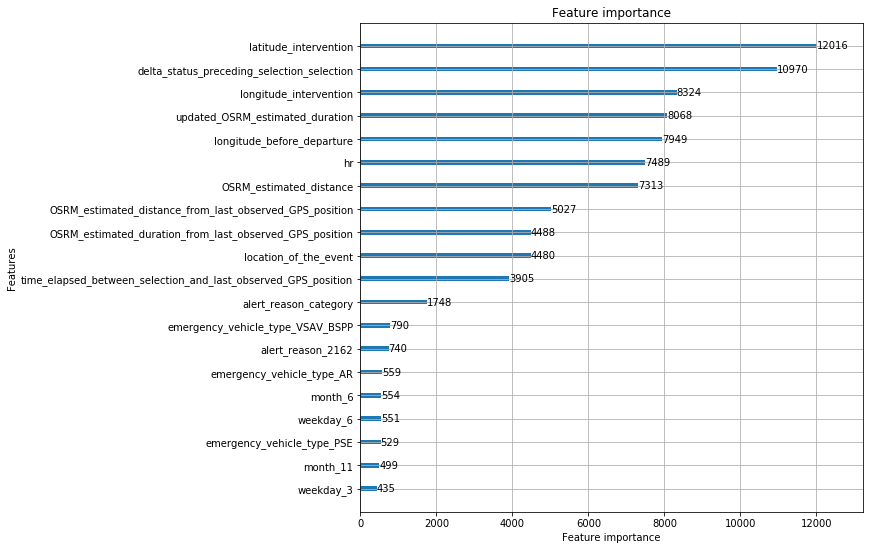

In [186]:
from pylab import rcParams
rcParams['figure.figsize'] = 9,9
lgb.plot_importance(lgbm1,max_num_features=20)


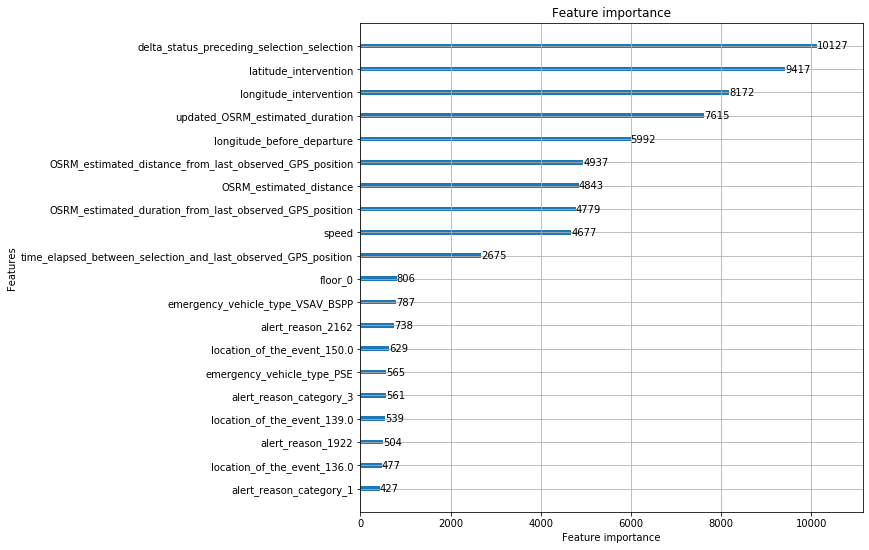

In [187]:
from pylab import rcParams
rcParams['figure.figsize'] = 9,9
lgb.plot_importance(lgbm2,max_num_features=20)

In [166]:
num_round=100
cv_results = lgb.cv(param, lgb_train, num_round, nfold=5, 
                    verbose_eval=20)

/home/yashas/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


[20]	cv_agg's l1: 96.6724 + 1.60883
[40]	cv_agg's l1: 87.4573 + 1.37217
[60]	cv_agg's l1: 85.2134 + 1.23757
[80]	cv_agg's l1: 84.449 + 1.15795
[100]	cv_agg's l1: 84.1471 + 1.1205
